# CA Coronavirus Cases and Deaths Trends

CA's [Blueprint for a Safer Economy](https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/COVID19CountyMonitoringOverview.aspx) assigns each county [to a tier](https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/COVID19CountyMonitoringOverview.aspx) based on case rate and test positivity rate. If counties fall into 2 different tiers on the two metrics, they are assigned to the more restrictive tier. What's opened / closed [under each tier](https://www.cdph.ca.gov/Programs/CID/DCDC/CDPH%20Document%20Library/COVID-19/Dimmer-Framework-August_2020.pdf).

Tiers, from most severe to least severe, categorizes coronavirus spread as <strong><span style='color:#6B1F84'>widespread; </span></strong>
<strong><span style='color:#F3324C'>substantial; </span></strong><strong><span style='color:#F7AE1D'>moderate; </span></strong><strong><span style = 'color:#D0E700'>or minimal.</span></strong>
**Counties must stay in the current tier for 3 consecutive weeks and metrics from the last 2 consecutive weeks must fall into less restrictive tier before moving into a less restrictive tier.**

Case charts are labeled with the tier cut-offs after adjusting for the county's population.

In [1]:
import pandas as pd

import utils
import make_charts
import default_parameters

from IPython.display import display_html, Markdown, HTML

# Default parameters
time_zone = default_parameters.time_zone
start_date = default_parameters.start_date
today_date = default_parameters.today_date

In [2]:
def prep_county_for_state(start_date, state):
    df = utils.prep_us_county_time_series()

    keep_cols = [
        "county",
        "state",
        "state_abbrev",
        "fips",
        "date",
        "Lat",
        "Lon",
        "cases",
        "deaths",
        "new_cases",
        "new_deaths",
    ]

    df = (
        df[df.state_abbrev == state][keep_cols]
        .sort_values(["county", "state", "fips", "date"])
        .reset_index(drop=True)
    )
    
    # Merge in population
    CROSSWALK_URL = utils.CROSSWALK_URL
    
    pop = (pd.read_csv(CROSSWALK_URL, dtype={"county_fips": "str", "cbsacode": "str"})
           [["county_fips", "county_pop"]]
           .rename(columns = {"county_fips": "fips"})
          )

    df = pd.merge(df, pop,
                  on = "fips", how = "inner", validate = "m:1"
    )
    
    df = utils.calculate_rolling_average(df, start_date, today_date)
    df = utils.find_tier_cutoffs(df, "county_pop")
    
    return df

In [3]:
STATE = "CA"
ca = prep_county_for_state(start_date, STATE)
ca_counties = list(ca[ca.state_abbrev==STATE].county.unique())   

In [4]:
def make_chart(df, county_name, start_date):
    df = df[(df.county==county_name) & 
            (df.date >= start_date)]
    
    county_state_name = county_name + f", {STATE}"
    display(Markdown(f"## {county_state_name}"))
    name = df.county.iloc[0]
    make_charts.make_cases_deaths_chart(df, "county", name)

## Counties by Region
<strong>Superior California Region: </strong> Butte, Colusa, El Dorado, Glenn, Lassen, Modoc, Nevada, Placer, Plumas, Sacramento, Shasta, Sierra, Siskiyou, Sutter, Tehama, Yolo, Yuba
<br>
<strong>North Coast:</strong> Del Norte, Humboldt, Lake, Mendocino, Napa, Sonoma, Trinity
<br>
<strong>San Francisco Bay Area:</strong> [Alameda](#alameda), 
[Contra Costa](#contra_costa), 
[Marin](#marin), 
[San Francisco](#san_francisco), 
[San Mateo](#san_mateo), 
[Santa Clara](#santa_clara), 
[Solano](#solano)
<br>
<strong>Northern San Joaquin Valley:</strong> Alpine, Amador, Calaveras, Madera, Mariposa, Merced, Mono, San Joaquin, Stanislaus, Tuolumne
<br>
<strong>Central Coast:</strong> Monterey, San Benito, San Luis Obispo, Santa Barbara, Santa Cruz, Ventura
<br>
<strong>Southern San Joaquin Valley:</strong> Fresno, Inyo, Kern, Kings, Tulare
<br>
<strong>Southern California:</strong> [Los Angeles](#la), 
[Orange](#orange), 
[Riverside](#riverside), 
[San Bernardino](#san_bernardino)
<br>
<strong>San Diego-Imperial:</strong> Imperial, San Diego

Ref: [Census CA Regions](https://census.ca.gov/regions/)

<a id='la'></a>

## Los Angeles, CA

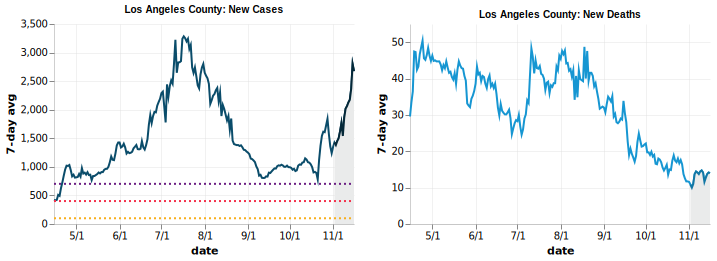

In [16]:
c = "Los Angeles"
make_chart(ca, c, start_date)

<a id='alameda'></a>

## Alameda, CA

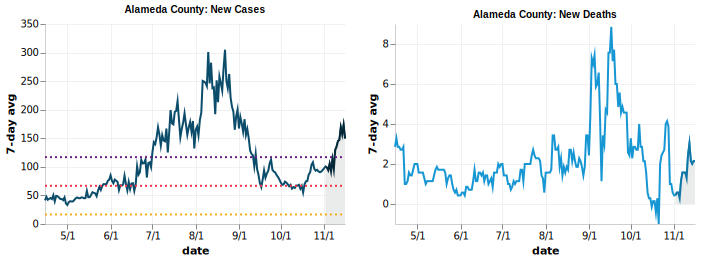

In [6]:
c = "Alameda"
make_chart(ca, c, start_date)

<a id='contra_costa'></a>

## Contra Costa, CA

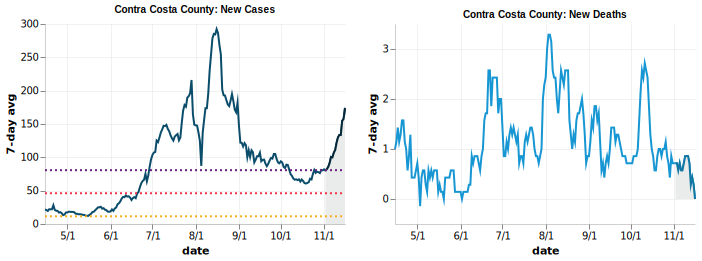

In [7]:
c = "Contra Costa"
make_chart(ca, c, start_date)

<a id='marin'></a>

## Marin, CA

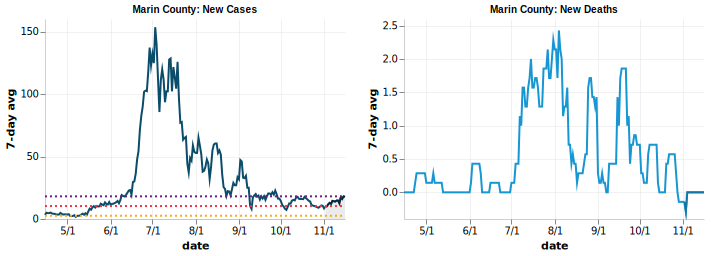

In [8]:
c = "Marin"
make_chart(ca, c, start_date)

<a id='orange'></a>

## Orange, CA

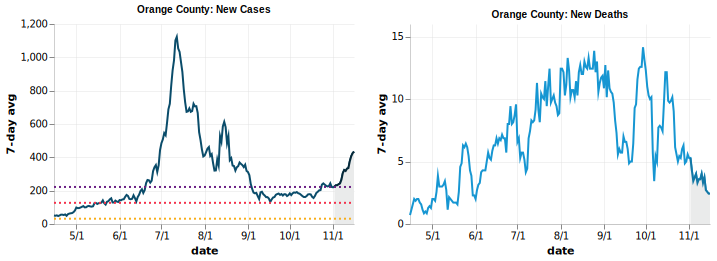

In [9]:
c = "Orange"
make_chart(ca, c, start_date)

<a id='riverside'></a>

## Riverside, CA

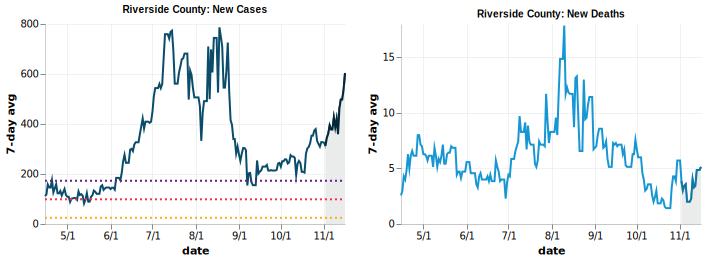

In [10]:
c = "Riverside"
make_chart(ca, c, start_date)

<a id='san_bernardino'></a>

## San Bernardino, CA

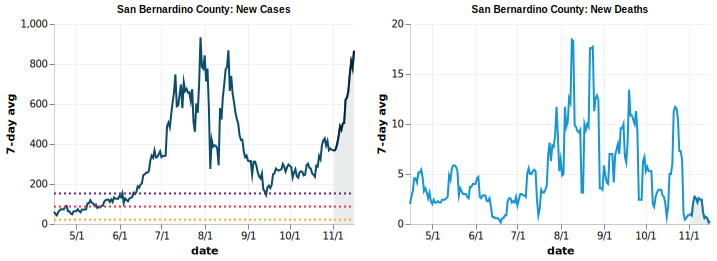

In [11]:
c = "San Bernardino"
make_chart(ca, c, start_date)

<a id='san_francisco'></a>

## San Francisco, CA

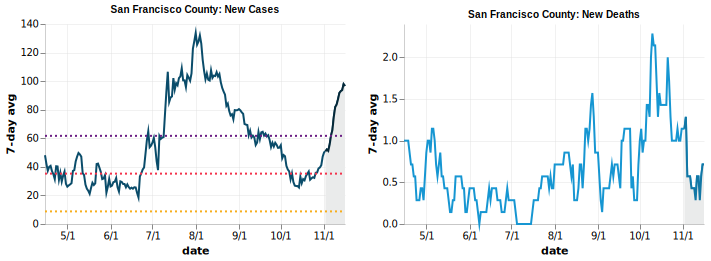

In [12]:
c = "San Francisco"
make_chart(ca, c, start_date)

<a id='san_mateo'></a>

## San Mateo, CA

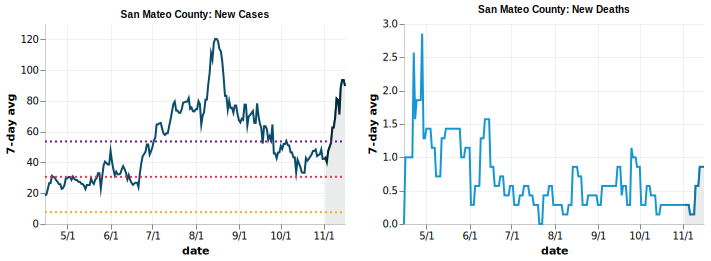

In [13]:
c = "San Mateo"
make_chart(ca, c, start_date)

<a id='santa_clara'></a>

## Santa Clara, CA

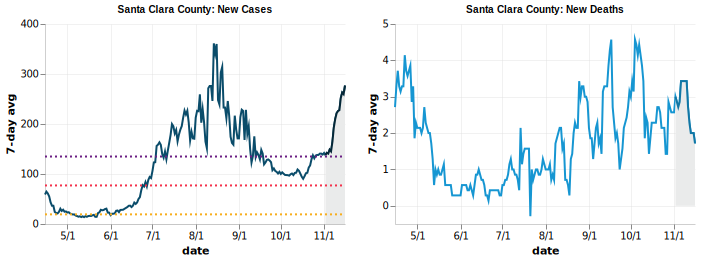

In [14]:
c = "Santa Clara"
make_chart(ca, c, start_date)

<a id='solano'></a>

## Solano, CA

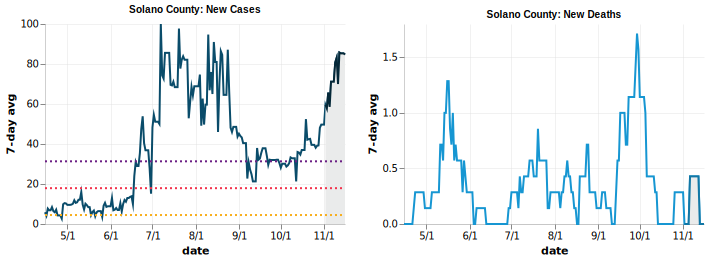

In [15]:
c = "Solano"
make_chart(ca, c, start_date)